In [1]:
import pandas as pd
import numpy as np

In [104]:
dataset=pd.read_csv("carprices.csv")
dataset

,carModel,Mileage,SellPrice,age
0,BMW X5,69000.0,18000.0,6.0
1,BMW X5,NaN,34000.0,3.0
2,BMW X5,57000.0,26100.0,5.0
3,BMW X5,22500.0,40000.0,NaN
4,BMW X5,46000.0,31500.0,4.0
5,Audi A5,59000.0,NaN,5.0
6,Audi A5,52000.0,32000.0,5.0
7,Audi A5,NaN,19300.0,6.0
8,Audi A5,91000.0,12000.0,NaN
9,Mercedez Benz C class,67000.0,NaN,6.0


# dummy variables

In [105]:
dummies=pd.get_dummies(dataset["carModel"])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [106]:
new=pd.concat([dataset,dummies],axis="columns")
new

,carModel,Mileage,SellPrice,age,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000.0,18000.0,6.0,0,1,0
1,BMW X5,NaN,34000.0,3.0,0,1,0
2,BMW X5,57000.0,26100.0,5.0,0,1,0
3,BMW X5,22500.0,40000.0,NaN,0,1,0
4,BMW X5,46000.0,31500.0,4.0,0,1,0
5,Audi A5,59000.0,NaN,5.0,1,0,0
6,Audi A5,52000.0,32000.0,5.0,1,0,0
7,Audi A5,NaN,19300.0,6.0,1,0,0
8,Audi A5,91000.0,12000.0,NaN,1,0,0
9,Mercedez Benz C class,67000.0,NaN,6.0,0,0,1


In [107]:
final=new.drop(["carModel"],axis="columns")

In [108]:
new.isnull().any()

carModel                 False
Mileage                   True
SellPrice                 True
age                       True
Audi A5                  False
BMW X5                   False
Mercedez Benz C class    False
dtype: bool

# Simpleimputer for missing value handling

In [109]:
from sklearn.impute import SimpleImputer

In [110]:
x=final.iloc[:,:].values
x

array([[6.90e+04, 1.80e+04, 6.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [     nan, 3.40e+04, 3.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [5.70e+04, 2.61e+04, 5.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [2.25e+04, 4.00e+04,      nan, 0.00e+00, 1.00e+00, 0.00e+00],
       [4.60e+04, 3.15e+04, 4.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [5.90e+04,      nan, 5.00e+00, 1.00e+00, 0.00e+00, 0.00e+00],
       [5.20e+04, 3.20e+04, 5.00e+00, 1.00e+00, 0.00e+00, 0.00e+00],
       [     nan, 1.93e+04, 6.00e+00, 1.00e+00, 0.00e+00, 0.00e+00],
       [9.10e+04, 1.20e+04,      nan, 1.00e+00, 0.00e+00, 0.00e+00],
       [6.70e+04,      nan, 6.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [8.30e+04, 2.00e+04, 7.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [7.90e+04, 2.10e+04, 7.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [5.90e+04, 3.30e+04, 5.00e+00, 0.00e+00, 0.00e+00, 1.00e+00]])

In [111]:
s_imputer=SimpleImputer(missing_values=np.nan,strategy="median")

In [112]:
s_imputer=s_imputer.fit(final.iloc[:,:])
final.iloc[:,:]=s_imputer.transform(final.iloc[:,:])


In [113]:
final

,Mileage,SellPrice,age,Audi A5,BMW X5,Mercedez Benz C class
0,69000.0,18000.0,6.0,0.0,1.0,0.0
1,59000.0,34000.0,3.0,0.0,1.0,0.0
2,57000.0,26100.0,5.0,0.0,1.0,0.0
3,22500.0,40000.0,5.0,0.0,1.0,0.0
4,46000.0,31500.0,4.0,0.0,1.0,0.0
5,59000.0,26100.0,5.0,1.0,0.0,0.0
6,52000.0,32000.0,5.0,1.0,0.0,0.0
7,59000.0,19300.0,6.0,1.0,0.0,0.0
8,91000.0,12000.0,5.0,1.0,0.0,0.0
9,67000.0,26100.0,6.0,0.0,0.0,1.0


In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
reg=LinearRegression()

In [116]:
x=final.iloc[:,:6]
X=x.drop(["SellPrice","Mercedez Benz C class"],axis="columns")
X

,Mileage,age,Audi A5,BMW X5
0,69000.0,6.0,0.0,1.0
1,59000.0,3.0,0.0,1.0
2,57000.0,5.0,0.0,1.0
3,22500.0,5.0,0.0,1.0
4,46000.0,4.0,0.0,1.0
5,59000.0,5.0,1.0,0.0
6,52000.0,5.0,1.0,0.0
7,59000.0,6.0,1.0,0.0
8,91000.0,5.0,1.0,0.0
9,67000.0,6.0,0.0,0.0


In [151]:
y=final["SellPrice"].values
y

array([18000., 34000., 26100., 40000., 31500., 26100., 32000., 19300.,
       12000., 26100., 20000., 21000., 33000.])

In [152]:
import matplotlib.pyplot as plt

In [153]:
!pip install seaborn

In [154]:
import seaborn as sns

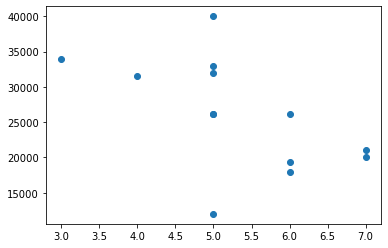

In [166]:
plt.scatter(X["age"],y)
plt.show()

In [165]:
pred=reg.fit(X,y)
pred

LinearRegression()

In [161]:
pred.predict([[22500,4,1,0]])

array([43181.01254484])

In [162]:
reg.score(X,y)

0.943333438260018